In [ ]:
import pandas as pd
import numpy as np
import os
import kagglehub

In [ ]:
path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")

100%|██████████| 5.20G/5.20G [00:25<00:00, 219MB/s]

Extracting files...


In [ ]:
csv_file_path = os.path.join(path, "hmnist_28_28_RGB.csv")
df = pd.read_csv(csv_file_path)
print(df.head())


   pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        197        154        185        202  ...        173        124   
1        123         93        126        158  ...         60         39   
2        201        142        160        206  ...        167        129   
3        143        103        119        171  ...         44         26   
4        215        162        191        225  ...        209        166   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        138        183        147        166

In [ ]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [ ]:
print(df.shape)

(10015, 2353)


In [ ]:
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['pixel0000', 'pixel0001', 'pixel0002', 'pixel0003', 'pixel0004',
       'pixel0005', 'pixel0006', 'pixel0007', 'pixel0008', 'pixel0009',
       ...
       'pixel2343', 'pixel2344', 'pixel2345', 'pixel2346', 'pixel2347',
       'pixel2348', 'pixel2349', 'pixel2350', 'pixel2351', 'label'],
      dtype='object', length=2353)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 2353 entries, pixel0000 to label
dtypes: int64(2353)
memory usage: 179.8 MB


In [ ]:
df.nunique()

,0
pixel0000,256
pixel0001,242
pixel0002,255
pixel0003,255
pixel0004,240
...,...
pixel2348,255
pixel2349,254
pixel2350,237
pixel2351,252


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel0000,10015.0,181.056415,59.746698,0.0,158.0,198.0,224.0,255.0
pixel0001,10015.0,131.728407,45.043473,0.0,117.0,141.0,159.0,246.0
pixel0002,10015.0,141.240240,48.672670,0.0,123.0,151.0,172.0,255.0
pixel0003,10015.0,187.274488,54.021274,0.0,165.0,201.0,226.0,254.0
pixel0004,10015.0,137.089466,41.138096,0.0,122.0,144.0,162.0,246.0
...,...,...,...,...,...,...,...,...
pixel2348,10015.0,138.752172,45.642257,0.0,120.0,146.0,166.0,255.0
pixel2349,10015.0,172.307239,58.533979,0.0,153.0,191.0,212.0,254.0
pixel2350,10015.0,127.871193,46.453818,0.0,113.0,138.0,156.0,249.0
pixel2351,10015.0,133.144483,49.060028,0.0,115.0,142.0,163.0,254.0


In [ ]:
df.isnull().sum()

,0
pixel0000,0
pixel0001,0
pixel0002,0
pixel0003,0
pixel0004,0
...,...
pixel2348,0
pixel2349,0
pixel2350,0
pixel2351,0


In [ ]:
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  2


In [ ]:
# Remove duplicates
df = df.drop_duplicates()

df.reset_index(drop=True, inplace=True)

value_after_removal = len(df[df.duplicated()])
print("The number of duplicate values in the dataset after removal is =", value_after_removal)


The number of duplicate values in the dataset after removal is = 0


In [ ]:
fractions=np.array([0.8,0.2])
df=df.sample(frac=1)
train_set, test_set = np.array_split(
    df, (fractions[:-1].cumsum() * len(df)).astype(int))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
print(len(train_set))

8010


In [ ]:
print(len(test_set))

2003


In [ ]:
df.label.unique()

array([4, 6, 1, 2, 0, 5, 3])

In [ ]:
classes={0:('actinic keratoses and intraepithelial carcinomae(Cancer)'),
         1:('basal cell carcinoma(Cancer)'),
         2:('benign keratosis-like lesions(Non-Cancerous)'),
         3:('dermatofibroma(Non-Cancerous)'),
         4:('melanocytic nevi(Non-Cancerous)'),
         5:('pyogenic granulomas and hemorrhage(Can lead to cancer)'),
         6:('melanoma(Cancer)')}


In [ ]:
y_train = train_set['label']
x_train = train_set.drop(columns=['label'])
y_test = test_set['label']
x_test = test_set.drop(columns=['label'])


In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train)

In [ ]:
for k in range(7):
  print("Number of ", classes[k],"images: ", len([i for i in y_train if i==k]))

Number of  actinic keratoses and intraepithelial carcinomae(Cancer) images:  5365
Number of  basal cell carcinoma(Cancer) images:  5365
Number of  benign keratosis-like lesions(Non-Cancerous) images:  5365
Number of  dermatofibroma(Non-Cancerous) images:  5365
Number of  melanocytic nevi(Non-Cancerous) images:  5365
Number of  pyogenic granulomas and hemorrhage(Can lead to cancer) images:  5365
Number of  melanoma(Cancer) images:  5365


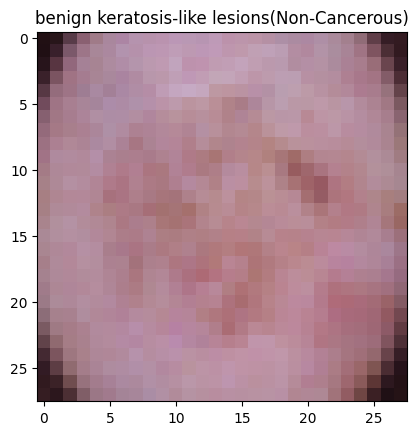

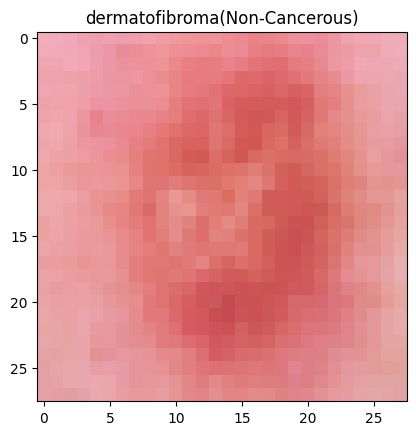

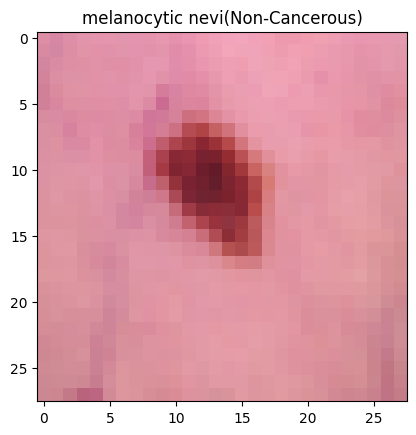

In [ ]:
import matplotlib.pyplot as plt
import random
x_train = np.array(x_train, dtype=np.uint8).reshape(-1, 28, 28, 3)
for _ in range(3):
  num = random.randint(0, 8000)
  plt.imshow(x_train[num].reshape(28, 28, 3))
  plt.title(classes[y_train[num]])
  plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0

In [ ]:
#Checkpoint
# checkpoint_path = "/content/sample_data/Checkpoints/model-{epoch:03d}.hdf5"
# callback = tf.keras.callbacks.ModelCheckpoint('D:/Coding/Skin_Cancer_Detection/Checkpoints/model-{epoch:3d}.hdf5', monitor='val_accuracy', mode='auto', verbose=0, save_best_only=True)
# Define the path for saving checkpoints
checkpoint_path = "/content/sample_data/Checkpoints/model-{epoch:03d}.hdf5"

# Set up the ModelCheckpoint callback using checkpoint_path
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,   # Use the variable here
    monitor='val_accuracy',
    mode='auto',
    verbose=0,
    save_best_only=True
)


In [ ]:
Optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Optimizer, metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size=128,
                    epochs=50,
                    shuffle=True,
                    callbacks=[callback])

Epoch 1/50
235/235 [==============================] - 10s 29ms/step - loss: 1.2344 - accuracy: 0.5581 - val_loss: 2.2864 - val_accuracy: 0.1923
Epoch 2/50
  3/235 [..............................] - ETA: 7s - loss: 0.6601 - accuracy: 0.7630

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


235/235 [==============================] - 6s 25ms/step - loss: 0.4448 - accuracy: 0.8535 - val_loss: 1.7127 - val_accuracy: 0.3717
Epoch 3/50
235/235 [==============================] - 6s 26ms/step - loss: 0.2654 - accuracy: 0.9118 - val_loss: 1.5425 - val_accuracy: 0.4234
Epoch 4/50
235/235 [==============================] - 6s 26ms/step - loss: 0.2200 - accuracy: 0.9228 - val_loss: 1.2437 - val_accuracy: 0.4672
Epoch 5/50
235/235 [==============================] - 6s 26ms/step - loss: 0.1872 - accuracy: 0.9355 - val_loss: 0.9278 - val_accuracy: 0.6542
Epoch 6/50
235/235 [==============================] - 6s 26ms/step - loss: 0.1458 - accuracy: 0.9495 - val_loss: 0.7723 - val_accuracy: 0.6176
Epoch 7/50
235/235 [==============================] - 6s 26ms/step - loss: 0.1413 - accuracy: 0.9513 - val_loss: 1.0177 - val_accuracy: 0.5471
Epoch 8/50
235/235 [==============================] - 6s 26ms/step - loss: 0.1088 - accuracy: 0.9629 - val_loss: 0.7697 - val_accuracy: 0.6230
Epoch 9/50

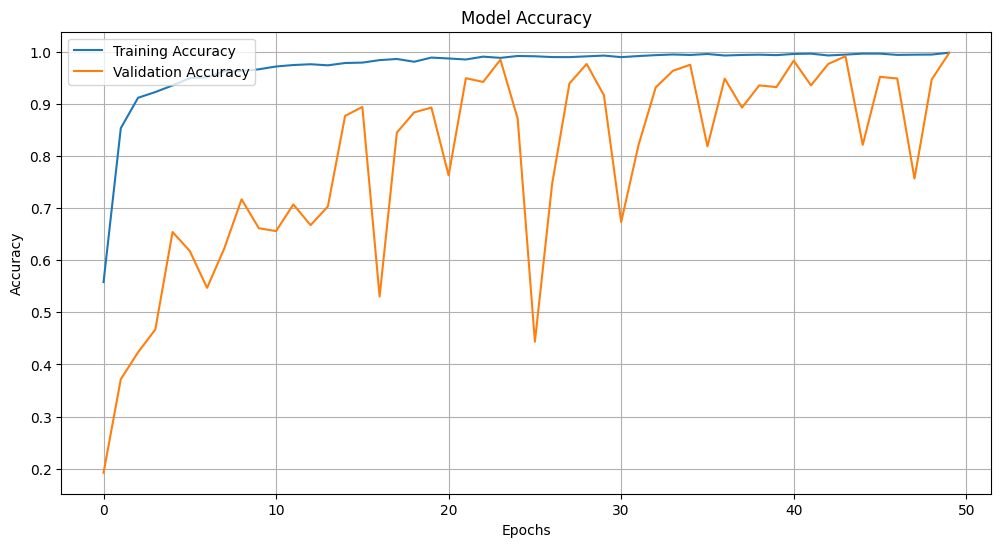

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid()
plt.show()

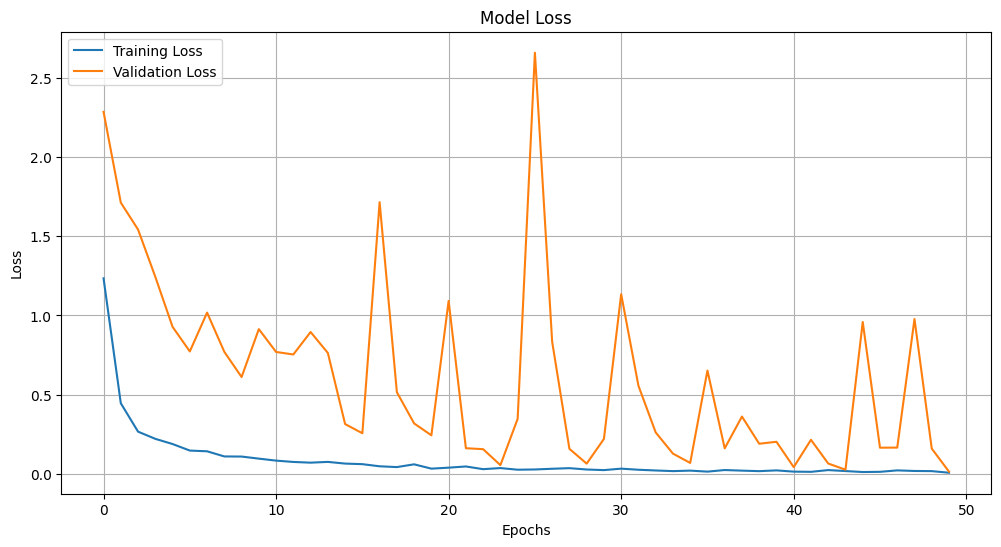

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:

model.load_weights('/content/sample_data/Checkpoints/model-050.hdf5')


In [ ]:
x_test = np.array(x_test).reshape(-1, 28, 28, 3)
loss, acc = model.evaluate(x_test, y_test, verbose=2)

63/63 - 1s - loss: 1.6504 - accuracy: 0.7379 - 714ms/epoch - 11ms/step


In [ ]:
import PIL
img = PIL.Image.open('/content/sample_data/testing_images/mole.jpeg')
img = img.resize((28, 28))
img = np.array(img).reshape(-1, 28, 28, 3)
result = model.predict(img)

# print(result[0])

result=result.tolist()
max_prob=max(result[0])
class_ind=result[0].index(max_prob)
print(classes[class_ind])
print("Confidence: ", max(result[0])*100,"%")

1/1 [==============================] - 0s 203ms/step
melanoma(Cancer)
Confidence:  99.83214735984802 %


# Model Comparision


In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications import VGG16, ResNet50
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import kagglehub

# Load dataset
def load_data():
    # Download and load the dataset
    path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")
    csv_file_path = os.path.join(path, "hmnist_28_28_RGB.csv")
    df = pd.read_csv(csv_file_path)

    # Extract image data and labels
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    # Reshape images to 28x28x3 and normalize
    X = X.reshape(-1, 28, 28, 3) / 255.0

    # Convert labels to categorical using LabelBinarizer
    lb = LabelBinarizer()
    y = lb.fit_transform(y)

    # If binary classification, expand dims to match model output
    if y.shape[1] == 1:
        y = np.hstack((1 - y, y))

    return X, y, lb.classes_

# Define CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Define VGG16 model
def create_vgg16_model(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    for layer in base_model.layers:
        layer.trainable = False
    return model

# Define ResNet50 model
def create_resnet_model(input_shape, num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    for layer in base_model.layers:
        layer.trainable = False
    return model

# Define FCNN model
def create_fcnn_model(input_dim, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Training function
def train_model(model, X_train, y_train, X_val, y_val, epochs=5):
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=32,
        callbacks=[early_stopping]
    )
    return history


# Load and split data
X, y, class_names = load_data()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_classes = y.shape[1]
print(f"Number of classes: {num_classes}")
print(f"Input shape: {X.shape[1:]}")

# Create and compile models
models = {
    'CNN': create_cnn_model(X.shape[1:], num_classes),
    'FCNN': create_fcnn_model(np.prod(X.shape[1:]), num_classes)
}

# Prepare resized data for VGG16 and ResNet50
x_train_resized = np.array([np.resize(img, (224, 224, 3)) for img in x_train])
x_test_resized = np.array([np.resize(img, (224, 224, 3)) for img in x_test])

# Add VGG16 and ResNet models
models['VGG16'] = create_vgg16_model((224, 224, 3), num_classes)
models['ResNet50'] = create_resnet_model((224, 224, 3), num_classes)

# Compile all models
for model in models.values():
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train models and store histories
histories = {}

# Train CNN
print("Training CNN...")
histories['CNN'] = train_model(models['CNN'], x_train, y_train, x_test, y_test)

# Train FCNN
print("Training FCNN...")
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)
histories['FCNN'] = train_model(models['FCNN'], x_train_flat, y_train, x_test_flat, y_test)

# Train VGG16 and ResNet50
print("Training VGG16...")
histories['VGG16'] = train_model(models['VGG16'], x_train_resized, y_train, x_test_resized, y_test)
print("Training ResNet50...")
histories['ResNet50'] = train_model(models['ResNet50'], x_train_resized, y_train, x_test_resized, y_test)


Number of classes: 7
Input shape: (28, 28, 3)
Training CNN...
Epoch 1/5
251/251 [==============================] - 3s 10ms/step - loss: 1.0762 - accuracy: 0.6679 - val_loss: 0.9335 - val_accuracy: 0.6680
Epoch 2/5
251/251 [==============================] - 2s 9ms/step - loss: 0.9288 - accuracy: 0.6689 - val_loss: 0.8859 - val_accuracy: 0.6680
Epoch 3/5
251/251 [==============================] - 2s 9ms/step - loss: 0.8933 - accuracy: 0.6772 - val_loss: 0.8690 - val_accuracy: 0.6815
Epoch 4/5
251/251 [==============================] - 2s 9ms/step - loss: 0.8768 - accuracy: 0.6842 - val_loss: 0.8618 - val_accuracy: 0.6905
Epoch 5/5
251/251 [==============================] - 2s 9ms/step - loss: 0.8404 - accuracy: 0.6897 - val_loss: 0.8331 - val_accuracy: 0.7024
Training FCNN...
Epoch 1/5
251/251 [==============================] - 2s 5ms/step - loss: 1.0857 - accuracy: 0.6633 - val_loss: 1.0385 - val_accuracy: 0.6550
Epoch 2/5
251/251 [==============================] - 1s 4ms/step - loss: 1

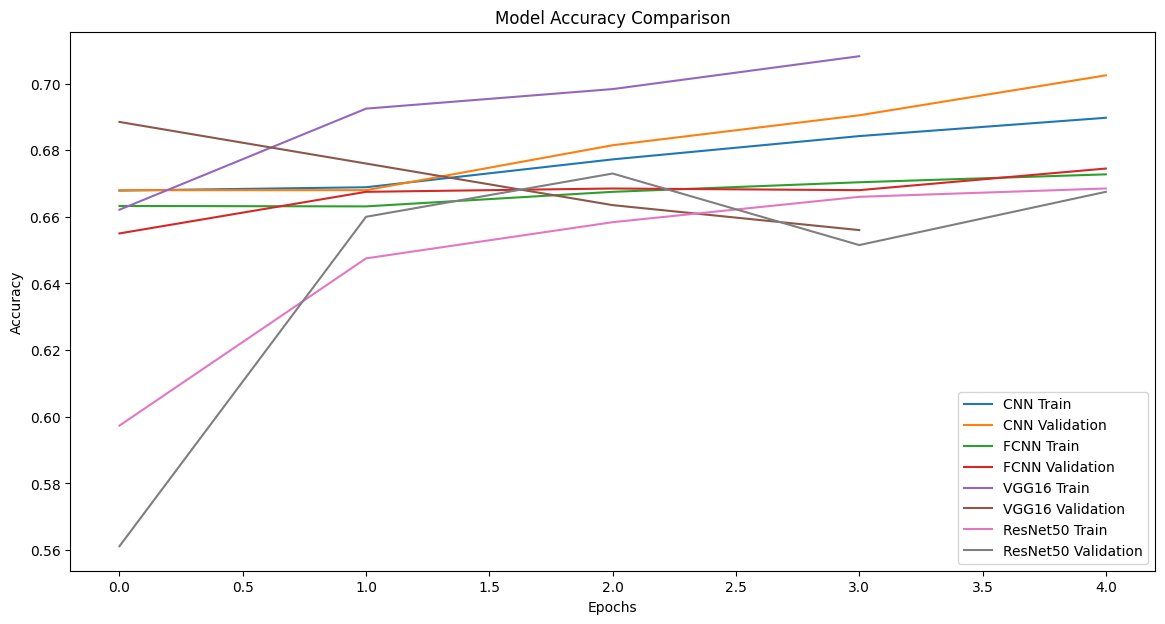


CNN Model Evaluation:
63/63 [==============================] - 0s 4ms/step
Test accuracy: 0.7024

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        69
     Class 1       0.40      0.52      0.45        93
     Class 2       0.37      0.46      0.41       228
     Class 3       0.00      0.00      0.00        28
     Class 4       0.78      0.94      0.85      1338
     Class 5       0.00      0.00      0.00        21
     Class 6       0.50      0.01      0.03       226

    accuracy                           0.70      2003
   macro avg       0.29      0.27      0.25      2003
weighted avg       0.64      0.70      0.64      2003


FCNN Model Evaluation:
63/63 [==============================] - 0s 2ms/step
Test accuracy: 0.6745

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        69
     Class 1       0.27      0.16      0.20      

In [7]:
class_names = [f'Class {i}' for i in range(num_classes)]  # Assuming 'num_classes' is defined

# Plotting model accuracy
plt.figure(figsize=(14, 7))
for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{name} Train')
    plt.plot(history.history['val_accuracy'], label=f'{name} Validation')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate models
for name, model in models.items():
    print(f"\n{name} Model Evaluation:")

    # Select appropriate test data for each model
    if name == 'FCNN':
        X_eval = x_test_flat
    elif name in ['VGG16', 'ResNet50']:
        X_eval = x_test_resized
    else:
        X_eval = x_test

    # Evaluate and print the test accuracy
    score = model.evaluate(X_eval, y_test, verbose=0)
    y_pred = model.predict(X_eval)
    print(f"Test accuracy: {score[1]:.4f}")

    # Generate classification report
    print("\nClassification Report:")
    print(classification_report(
        np.argmax(y_test, axis=1),
        np.argmax(y_pred, axis=1),
        target_names=class_names,
        zero_division=0  # Avoids warnings for undefined metrics
    ))